# Consolidation du dataset

## Importation des fichiers

In [2]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# Importation des données dans des dataframe

raw_data_2015 = pd.read_csv('archive/2015-building-energy-benchmarking.csv')
raw_data_2016 = pd.read_csv('archive/2016-building-energy-benchmarking.csv')

In [4]:
raw_data_2015.head(50)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576
5,9,2015,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),660000560,"{'latitude': '47.6164389', 'longitude': '-122....",7,DOWNTOWN,1999,1,2.0,97288,37198,60090,Police Station,Police Station,88830.0,NaN,NaN,NaN,NaN,NaN,NaN,135.7,146.9,313.5,321.6,12051984.0,13045258.0,0.0,2130921.0,7271004.0,47813.0,4781283.0,0.0,304.62,2.81,No,NaN,Compliant,NaN,NaN,56.0,NaN,7.0,19576
6,10,2015,NonResidential,Hotel,CAMLIN WORLDMARK HOTEL,660000825,"{'latitude': '47.6141141', 'longitude': '-122....",7,DOWNTOWN,1926,1,11.0,83008,0,83008,Hotel,Hotel,81352.0,NaN,NaN,NaN,NaN,NaN,25.0,76.9,79.6,149.5,158.2,6252842.0,6477493.0,0.0,785342.0,2679698.0,35733.0,3573255.0,0.0,208.46,2.37,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
7,11,2015,NonResidential,Other,PARAMOUNT THEATER,660000955,"{'latitude': '47.61290234', 'longitude': '-122...",7,DOWNTOWN,1926,1,8.0,102761,0,102761,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,102761.0,NaN,NaN,NaN,NaN,NaN,NaN,62.5,71.8,152.2,160.4,6426022.0,7380086.0,2003108.0,1203937.0,4108004.0,3151.0,315079.0,0.0,199.99,1.77,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
8,12,2015,NonResidential,Hotel,COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE

In [5]:
raw_data_2016.head(50)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2.003882e+06,1.156514e+06,3946027.0,1.276453e+04,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.000000e+00,9.504252e+05,3242851.0,5.145082e+04,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,2.156655e+07,1.451544e+07,49526664.0,1.493800e+04,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2.214446e+06,8.115253e+05,2768924.0,1.811213e+04,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.000000e+00,1.573449e+06,5368607.0,8.803998e+04,8803998.0,False,NaN,Compliant,NaN,505.01,2.88
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,7,DOWNTOWN,47.61623,-122.33657,1999,1.0,2,97288,37198,60090,Police Station,Police Station,88830.0,NaN,NaN,NaN,NaN,NaN,NaN,136.100006,141.600006,316.299988,320.500000,1.208662e+07,1.258171e+07,0.000000e+00,2.160444e+06,7371434.0,4.715182e+04,4715182.0,False,NaN,Compliant,NaN,301.81,3.10
6,10,2016,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.0,0660000825,7,DOWNTOWN,47.61390,-122.33283,1926,1.0,11,83008,0,83008,Hotel,Hotel,81352.0,NaN,NaN,NaN,NaN,NaN,27.0,70.800003,74.500000,146.600006,154.699997,5.758795e+06,6.062768e+06,0.000000e+00,8.239199e+05,2811215.0,2.947580e+04,2947580.0,False,NaN,Compliant,NaN,176.14,2.12
7,11,2016,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,98101.0,0660000955,7,DOWNTOWN,47.61327,-122.33136,1926,1.0,8,102761,0,102761,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,102761.0,NaN,NaN,NaN,NaN,NaN,NaN,61.299999,68.800003,141.699997,152.300003,6.298132e+06,7.067882e+06,2.276286e+06,1.065843e+06,3636655.0,3.851890e+03,385189.0,False,NaN,Compliant,NaN,221.51,2.16
8,12,2016,NonResidential,Hotel,311wh-Pioneer Square,612 2nd Ave,Seattle,WA,98104.0,0939000080,7,DOWNTOWN,47.60294,-122.33263,1904,1.0

In [6]:
print('Taille Data 2015 : '+str(raw_data_2015.shape))
print('Taille Data 2016 : '+str(raw_data_2016.shape))

Taille Data 2015 : (3340, 47)
Taille Data 2016 : (3376, 46)


## Différence de headers

On remarque une différence des noms de colonnes dans les deux dataset :

In [7]:
raw_data_2015.columns.difference(raw_data_2016.columns)

Index(['2010 Census Tracts', 'City Council Districts', 'Comment',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Location', 'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'],
      dtype='object')

In [8]:
raw_data_2016.columns.difference(raw_data_2015.columns)

Index(['Address', 'City', 'Comments', 'GHGEmissionsIntensity', 'Latitude',
       'Longitude', 'State', 'TotalGHGEmissions', 'ZipCode'],
      dtype='object')

### Uniformisation des headers du dataset 2015 par ceux du dataset 2016

In [9]:
raw_data_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [10]:
import ast
raw_data_2015['Location'] = [ast.literal_eval((item)) for index, item in raw_data_2015.Location.iteritems()]
raw_data_2015 = pd.concat([raw_data_2015.drop(['Location'], axis=1), raw_data_2015['Location'].apply(pd.Series)], axis=1)
raw_data_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in raw_data_2015.human_address.iteritems()]
raw_data_2015 = pd.concat([raw_data_2015.drop(['human_address'], axis=1), raw_data_2015['human_address'].apply(pd.Series)], axis=1)
raw_data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,...,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,...,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,...,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,...,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,...,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


In [11]:
raw_data_2015 = raw_data_2015.rename(columns={"latitude": "Latitude", "longitude": "Longitude",
                                              "address": "Address", "city": "City",
                                              "state": "State", "zip": "ZipCode"})

In [12]:
raw_data_2015.columns.difference(raw_data_2016.columns)


Index(['2010 Census Tracts', 'City Council Districts', 'Comment',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'],
      dtype='object')

In [13]:
raw_data_2016.columns.difference(raw_data_2015.columns)

Index(['Comments', 'GHGEmissionsIntensity', 'TotalGHGEmissions'], dtype='object')

In [14]:
raw_data_2015 = raw_data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                     'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                     'Comment':'Comments'})
raw_data_2015 = raw_data_2015.drop(['OtherFuelUse(kBtu)','2010 Census Tracts',
                'Seattle Police Department Micro Community Policing Plan Areas',
                'City Council Districts','SPD Beats', 'Zip Codes'], axis=1)

In [15]:
raw_data_2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,NaN,Compliant,NaN,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,NaN,Compliant,NaN,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,NaN,Compliant,NaN,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,No,NaN,Compliant,High Outlier,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,No,NaN,Compliant,NaN,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,2,DOWNTOWN,2000,1,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.6,27.8,80.4,87.2,1142949.0,1240429.0,0.0,334979.0,1142996.0,0.0,0.0,7.97,0.07,No,NaN,Compliant,NaN,47.59950256,-122.32034302,321 10TH AVE S,SEATTLE,WA,98104
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,4,NORTHEAST,2014,1,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.6,55.1,124.2,144.7,1543282.0,1750143.0,0.0,325705.0,1111352.0,4320.0,431976.0,30.69,0.61,No,NaN,Compliant,NaN,47.65752471,-122.3160159,4123 12TH AVE NE,SEATTLE,WA,98105
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,7,DOWNTOWN,2015,1,40.0,319481,41915,277566,"Multifamily Housing, Parking",NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,52.7,61.4,93.1,102.2,16834414.0,19623362.0,0.0,1690364.0,5767761.0,110669.0,11066893.0,627.97,1.89,No,NaN,Compliant,NaN,47.61649845,-122.33770787,2030 8TH AVE,SEATTLE,WA,98121
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,6392001040,4,NORTHEAST,1981,1,3.0,48230,0,48230,Multifamily Housing,Multifamily Ho

In [16]:
data = pd.concat([raw_data_2015[raw_data_2016.columns],raw_data_2016], axis = 0).sort_values(["DataYear", "OSEBuildingID"])

In [17]:
# Rechercher les diff absolues entre les deux années par OSEBuildingID

In [18]:
data.sort_values(by='OSEBuildingID')

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,SEATTLE,WA,98101,659000030,7,DOWNTOWN,47.61219025,-122.33799744,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,No,NaN,Compliant,NaN,249.43,2.64
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101,0659000030,7,DOWNTOWN,47.6122,-122.338,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.0,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101,0659000220,7,DOWNTOWN,47.6132,-122.334,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.0,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,SEATTLE,WA,98101,659000220,7,DOWNTOWN,47.61310583,-122.33335756,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,No,NaN,Compliant,NaN,263.51,2.38
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,1900 5TH AVE,SEATTLE,WA,98101,659000475,7,DOWNTOWN,47.61334897,-122.33769944,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,Yes,NaN,Compliant,NaN,2061.48,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.5672,-122.312,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.5962,-122.323,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.6364,-122.358,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swi

## Filtrage sur bâtiments non résidentiels

In [19]:
data = data[~data['BuildingType'].str.contains("Multifamily")]
print("Taille après filtrage : ", data.shape)

Taille après filtrage :  (3318, 46)


## Suppression et moyennage des duplicates 2015-2016

In [20]:
numerics = ['float', 'int']
numeric_columns = data.select_dtypes(include=numerics).columns.tolist()
numeric_columns.remove("DataYear")
numeric_columns

['OSEBuildingID',
 'CouncilDistrictCode',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [21]:
Meaned_columns = data[numeric_columns].groupby('OSEBuildingID').mean()

In [22]:
Meaned_columns.head()

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,
1,7.0,1927.0,1.0,12.0,88434.0,0.0,88434.0,88434.0,NaN,NaN,62.5,80.299998,82.300002,178.000000,182.050000,7103895.25,7277224.50,2.013457e+06,1.118411e+06,3816093.5,12744.264650,1274420.5,249.705,2.735
2,7.0,1996.0,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,56.0,94.600002,98.450001,183.700003,187.299997,8371084.00,8715133.50,0.000000e+00,1.047494e+06,3574131.0,47970.408205,4797033.5,279.685,2.620
3,7.0,1969.0,1.0,41.0,959050.0,98359.0,860691.0,756868.0,100000.0,0.0,30.5,96.300000,98.699998,242.299997,245.300003,72858840.00,74721692.00,2.061348e+07,1.454968e+07,49644549.5,26018.500000,2601850.0,2075.380,2.055
5,7.0,1926.0,1.0,10.0,61320.0,0.0,61320.0,61320.0,NaN,NaN,28.5,285.600002,287.900002,426.249998,433.600000,17511952.00,17655122.25,1.283648e+07,8.115232e+05,2768973.5,19065.565430,1906553.5,1111.385,18.025
8,7.0,1980.0,1.0,18.0,147735.0,37230.0,110505.0,123445.0,68009.0,0.0,71.0,117.450002,120.399998,220.099997,221.350003,14500852.50,14867373.00,0.000000e+00,1.675645e+06,5717426.0,87835.492190,8783551.5,506.355,3.450


## Consolidation du dataset final

In [23]:
dupl_data = data.drop_duplicates(subset=['OSEBuildingID'], keep='last')
dupl_data = dupl_data.drop(numeric_columns[1:], axis=1)
data = pd.merge(dupl_data, Meaned_columns, how='left', on='OSEBuildingID')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1698 entries, 0 to 1697
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1698 non-null   int64  
 1   DataYear                         1698 non-null   int64  
 2   BuildingType                     1698 non-null   object 
 3   PrimaryPropertyType              1698 non-null   object 
 4   PropertyName                     1698 non-null   object 
 5   Address                          1698 non-null   object 
 6   City                             1698 non-null   object 
 7   State                            1698 non-null   object 
 8   ZipCode                          1682 non-null   object 
 9   TaxParcelIdentificationNumber    1698 non-null   object 
 10  Neighborhood                     1698 non-null   object 
 11  Latitude                         1698 non-null   object 
 12  Longitude           

In [25]:
data.columns.sort_values()

Index(['Address', 'BuildingType', 'City', 'Comments', 'ComplianceStatus',
       'CouncilDistrictCode', 'DataYear', 'DefaultData', 'ENERGYSTARScore',
       'Electricity(kBtu)', 'Electricity(kWh)', 'GHGEmissionsIntensity',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'Latitude',
       'ListOfAllPropertyUseTypes', 'Longitude', 'NaturalGas(kBtu)',
       'NaturalGas(therms)', 'Neighborhood', 'NumberofBuildings',
       'NumberofFloors', 'OSEBuildingID', 'Outlier', 'PrimaryPropertyType',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal',
       'PropertyName', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'State', 'SteamUse(kBtu)',
       'TaxParcelIdentificationNumber', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'TotalGHGEmissions', 'YearBuilt

## Nettoyage

### Colonnes non utilisées dans l'étude à supprimer

- Comments
- NaturalGas(therms) (on garde NaturalGas(kBtu) car 1 therms = 100 kBtu)
- Electricity(kWh) (on garde Electricity(kBtu))
- Outlier (on supprime au préalable les lignes associées à ces outliers)
- 
- SiteEUIWN(kBtu/sf) : variable déclinée de SiteEUI(kBtu/sf)
- SiteEnergyUseWN(kBtu) : variable déclinée de SiteEnergyUse(kBtu)
- SourceEUIWN(kBtu/sf) : variable déclinée de SourceEUI(kBtu/sf)

In [26]:
data = data.drop(['NaturalGas(therms)', 'Electricity(kWh)', 'Comments', 'SiteEUIWN(kBtu/sf)',
                  'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)'], axis=1)

data = data[~data["Outlier"].isnull()==False]
data = data.drop('Outlier', axis=1)

Après analyse des données pour ces colonnes, on décide de filtrer sur ComplianceStatus = Compliant.  
Puis de supprimer les colonnes suivantes qui nous apporteront pas d'informations pertinentes pour notre étude :
- DefaultData 
- ComplianceStatus
- TaxParcelIdentificationNumber
- CouncilDistrictCode
- City

In [27]:
data = data[data['ComplianceStatus'] == "Compliant"]
data = data.drop(['DefaultData','ComplianceStatus', 'City',
                  'TaxParcelIdentificationNumber','CouncilDistrictCode'], axis=1)
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,State,ZipCode,Neighborhood,Latitude,Longitude,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,325,2015,NonResidential,Retail Store,WESTLAKE MALL RETAIL PORTION,400 PINE ST,WA,98101,DOWNTOWN,47.61171108,-122.33681575,NaN,NaN,NaN,NaN,NaN,1989.0,1.0,4.0,111077.0,0.0,111077.0,NaN,NaN,NaN,91.0,60.600000,190.200000,9.898724e+06,0.0,9.899135e+06,0.000000e+00,69.01,0.24
1,400,2015,NonResidential,Small- and Mid-Sized Office,GALLAND & SENECA BUILDINGS,1201 2ND AVE,WA,98101,DOWNTOWN,47.60679898,-122.3371001,Office,Office,NaN,NaN,NaN,1906.0,1.0,6.0,98370.0,25920.0,72450.0,98370.0,NaN,NaN,45.0,66.300000,207.500000,6.525887e+06,0.0,6.488262e+06,3.789300e+04,47.24,0.20
2,442,2015,NonResidential,Large Office,KING BROADCASTING,333 DEXTER AVE N,WA,98109,LAKE UNION,47.6214758,-122.3430502,"Data Center, Office, Other, Parking, Restaurant",Office,Parking,Other,NaN,1947.0,1.0,4.0,193788.0,37854.0,155934.0,138672.0,47539.0,11166.0,59.0,105.800000,332.300000,1.676022e+07,0.0,1.676091e+07,0.000000e+00,116.84,0.23
3,499,2015,NonResidential,Small- and Mid-Sized Office,ASIAN COUNSELING and REFERRAL SERVICE BUILDING,3639 MARTIN LUTHER KING JR WAY S,WA,98144,GREATER DUWAMISH,47.57089656,-122.2974118,"Office, Parking",Office,Parking,NaN,NaN,2008.0,1.0,3.0,76598.0,21410.0,55188.0,55188.0,21410.0,NaN,76.0,81.100000,169.800000,4.476997e+06,0.0,2.234200e+06,2.242889e+06,134.69,1.63
4,559,2015,NonResidential,Large Office,YALE & THOMAS,325 EASTLAKE AVE E,WA,98109,LAKE UNION,47.6212428,-122.3297865,"Office, Parking",Office,Parking,NaN,NaN,1981.0,1.0,4.0,186971.0,0.0,186971.0,186977.0,115477.0,NaN,86.0,67.700000,179.100000,1.266246e+07,0.0,9.657951e+06,3.004906e+06,226.92,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,50221,2016,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,WA,NaN,DELRIDGE NEIGHBORHOODS,47.5407,-122.374,Other - Recreation,Other - Recreation,NaN,NaN,NaN,1982.0,1.0,1.0,18261.0,0.0,18261.0,18261.0,NaN,NaN,NaN,51.000000,126.000000,9.320821e+05,0.0,6.323620e+05,2.997200e+05,20.33,1.11
1694,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,WA,NaN,DOWNTOWN,47.5962,-122.323,Other - Recreation,Other - Recreation,NaN,NaN,NaN,2004.0,1.0,1.0,16000.0,0.0,16000.0,16000.0,NaN,NaN,NaN,59.400002,114.199997,9.502762e+05,0.0,3.965461e+05,5.537300e+05,32.17,2.01
1695,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,WA,NaN,MAGNOLIA / QUEEN ANNE,47.6364,-122.358,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,NaN,1974.0,1.0,1.0,13157.0,0.0,13157.0,7583.0,5574.0,0.0,NaN,438.200012,744.799988,5.765898e+06,0.0,1.792159e+06,3.973739e+06,223.54,16.99
1696,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,WA,NaN,GREATER DUWAMISH,47.5283,-122.324,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,NaN,1989.0,1.0,1.0,14101.0,0.0,14101.0,6601.0,6501.0,484.0,NaN,51.000000,105.300003,7.194712e+05,0.0,3.488702e+05,3.706010e+05,22.11,1.57


Enfin, on veut se passer des relevés de consommation, donc on supprime les colonnes issues de relevés.

In [28]:
data = data.drop(['SteamUse(kBtu)','Electricity(kBtu)',
                         'NaturalGas(kBtu)'], axis=1)

### Taux de remplissage

OSEBuildingID                      100.000000
Longitude                          100.000000
DataYear                           100.000000
BuildingType                       100.000000
PrimaryPropertyType                100.000000
PropertyName                       100.000000
Address                            100.000000
State                              100.000000
Neighborhood                       100.000000
PropertyGFABuilding(s)             100.000000
PropertyGFAParking                 100.000000
PropertyGFATotal                   100.000000
NumberofFloors                     100.000000
NumberofBuildings                  100.000000
YearBuilt                          100.000000
Latitude                           100.000000
GHGEmissionsIntensity               99.936548
TotalGHGEmissions                   99.936548
SiteEUI(kBtu/sf)                    99.936548
SourceEUI(kBtu/sf)                  99.936548
SiteEnergyUse(kBtu)                 99.936548
ListOfAllPropertyUseTypes         

<AxesSubplot:>

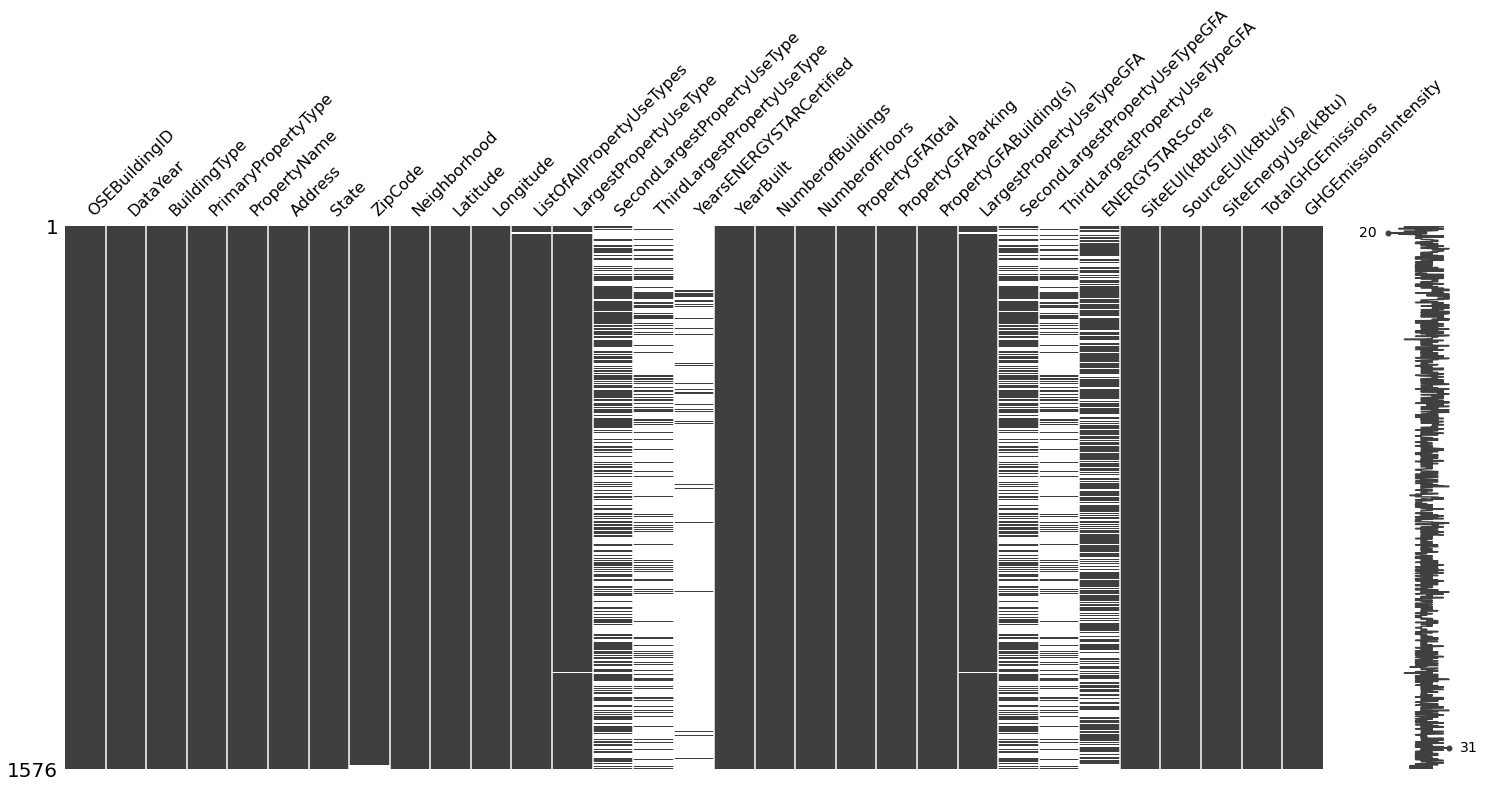

In [29]:
# Taux de remplissage
import missingno as msno
missing = ((1 - data.isnull().mean())*100).sort_values(ascending=False)
#missing = raw_data.shape[0]-raw_data.isnull().sum().sort_values(ascending=True)
print(missing)

# Aperçu des missing data
%matplotlib inline
msno.matrix(data)

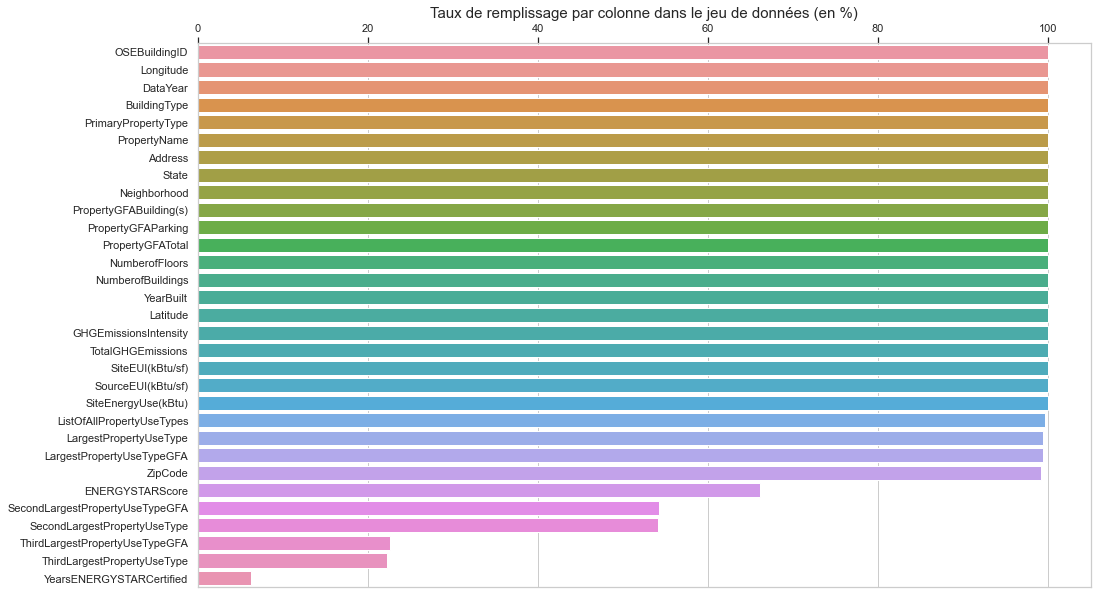

In [30]:
# Taux de remplissage par colonne dans le jeu de données (en %)
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
ax = sns.barplot(y=missing.index, x=missing.values)
ax.xaxis.set_ticks_position('top')
plt.title('Taux de remplissage par colonne dans le jeu de données (en %)', size=15)
plt.show()

### Traitement des outliers

In [31]:
# Méthode par écart à la moyenne de +/- n sigmas

def outliers_n_sigma(df, n):
    df_cleaned = df.copy()
    for column in df.select_dtypes(include=['int32', 'float64']).columns.tolist():
        # Ecart à la moyenne <= n ecarts types
        df_cleaned = df_cleaned[np.abs(
            df_cleaned[column]-df_cleaned[column].mean()) <= (n*df_cleaned[column].std())]
    print("    Taille avant traitement des outliers : ", df.shape,
          "\n    Taille après traitement des outliers : ", df_cleaned.shape)
    return df_cleaned

In [32]:
outliers_n_sigma(data,4)

    Taille avant traitement des outliers :  (1576, 31) 
    Taille après traitement des outliers :  (124, 31)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,State,ZipCode,Neighborhood,Latitude,Longitude,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
2,442,2015,NonResidential,Large Office,KING BROADCASTING,333 DEXTER AVE N,WA,98109,LAKE UNION,47.6214758,-122.3430502,"Data Center, Office, Other, Parking, Restaurant",Office,Parking,Other,NaN,1947.0,1.0,4.0,193788.0,37854.0,155934.0,138672.0,47539.0,11166.0,59.0,105.800000,332.300000,1.676022e+07,116.840,0.230
9,838,2015,NonResidential,Medical Office,NORTHWEST MEDICAL CENTER,1001 BROADWAY,WA,98122,EAST,47.61142131,-122.3213375,"Medical Office, Office, Other",Medical Office,Office,Other,NaN,1928.0,1.0,3.0,83448.0,15479.0,67969.0,42527.0,27961.0,529.0,54.0,93.900000,176.900000,6.668456e+06,231.390,2.640
31,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,WA,98101,DOWNTOWN,47.6132,-122.334,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,NaN,1996.0,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,56.0,94.600002,183.700003,8.371084e+06,279.685,2.620
34,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,WA,98121,DOWNTOWN,47.6138,-122.34,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN,1980.0,1.0,18.0,147735.0,37230.0,110505.0,123445.0,68009.0,0.0,71.0,117.450002,220.099997,1.450085e+07,506.355,3.450
73,57,2016,NonResidential,Large Office,5th and Pine,413 Pine Street,WA,98101,DOWNTOWN,47.6113,-122.337,"Data Center, Office, Retail Store",Office,Retail Store,Data Center,2016,1973.0,1.0,5.0,168115.0,0.0,168115.0,103431.5,65676.0,423.5,78.5,55.300000,173.650003,9.375001e+06,65.355,0.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,40348,2016,NonResidential,Mixed Use Property,Broadway Market,401 Broadway E,WA,98102,EAST,47.6226,-122.321,"Multifamily Housing, Parking, Personal Service...",Parking,Supermarket/Grocery Store,Multifamily Housing,NaN,1916.0,1.0,2.0,140823.0,59401.0,81422.0,123715.0,64000.0,41014.0,30.0,52.950000,163.000000,8.174458e+06,67.795,0.275
1617,49697,2016,NonResidential,Mixed Use Property,Prudential Building,114 Alaskan Way S,WA,98104,DOWNTOWN,47.6012,-122.335,"Multifamily Housing, Office, Parking",Office,Multifamily Housing,Parking,NaN,1902.0,1.0,6.0,74211.0,0.0,74211.0,33279.0,29878.0,8421.0,97.0,21.750000,68.350000,1.374344e+06,9.580,0.090
1628,49737,2016,NonResidential,Retail Store,MARQUEEN / MQH,600 Queen Anne Ave N,WA,98109,MAGNOLIA / QUEEN ANNE,47.625,-122.356,"Hotel, Parking, Retail Store",Retail Store,Hotel,Parking,NaN,1918.0,1.0,3.0,43832.0,6519.0,37313.0,24588.0,17558.0,1686.0,67.0,89.749998,163.600000,3.782742e+06,136.400,3.040
1638,49802,2016,NonResidential,Hotel,Hotel Ballard,5216 Ballard Ave NW,WA,98107,BALLARD,47.6663,-122.383,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN,2013.0,1.0,4.0,62381.0,11474.0,50907.0,60245.0,26067.0,0.0,59.5,59.100000,185.650002,3.561325e+06,24.825,0.275


# Analyse exploratoire

## Analyse des variables intéressantes pour l'étude

- Consommation d'énergie par bâtiment ```SiteEnergyUse(kBtu)```
- Emissions de gaz à effet de serre ```TotalGHGEmissions```

In [33]:
print(data['SiteEnergyUse(kBtu)'].isnull().sum())
print(data['TotalGHGEmissions'].isnull().sum())

1
1


In [34]:
# On supprime les lignes des ces deux variables présentant des valeurs nulles
data = data[~((data['SiteEnergyUse(kBtu)'].isnull()))]
data = data[~((data['TotalGHGEmissions'].isnull()))]

### Distributions

/Users/louisrageot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot')

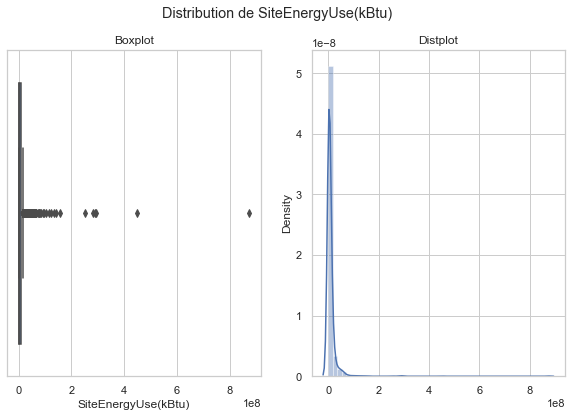

In [35]:
# Distribution de SiteEnergyUse(kBtu)

f, axes = plt.subplots(1, 2, figsize=(10, 6))
f.suptitle("Distribution de SiteEnergyUse(kBtu)")
ax1 = sns.boxplot(x=data['SiteEnergyUse(kBtu)'], ax=axes[0])
ax1.set_title("Boxplot")
ax2 = sns.distplot(x=data['SiteEnergyUse(kBtu)'], ax=axes[1])
ax2.set_title("Distplot")

- Variations très importantes autour de 0 -> on passe au log (transformation logarithmique)

/Users/louisrageot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot')

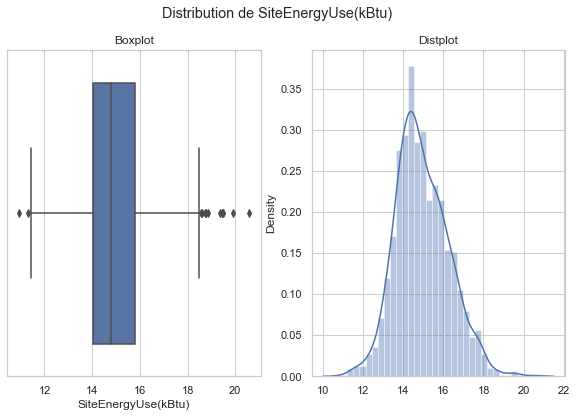

In [36]:
# Distribution de SiteEnergyUse(kBtu)

f, axes = plt.subplots(1, 2, figsize=(10, 6))
f.suptitle("Distribution de SiteEnergyUse(kBtu)")
ax1 = sns.boxplot(x=np.log(data['SiteEnergyUse(kBtu)']), ax=axes[0])
ax1.set_title("Boxplot")
ax2 = sns.distplot(x=np.log(data['SiteEnergyUse(kBtu)']), ax=axes[1])
ax2.set_title("Distplot")

/Users/louisrageot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot')

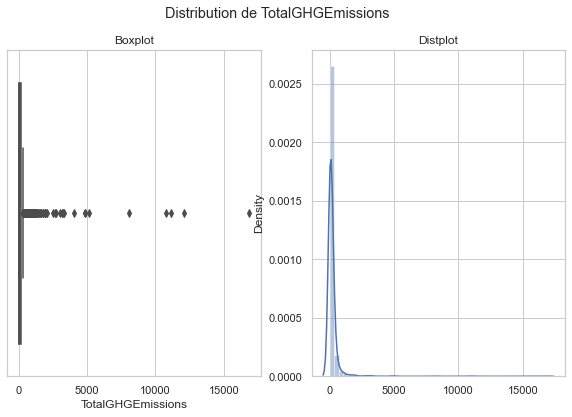

In [37]:
# Distribution de TotalGHGEmissions

f, axes = plt.subplots(1, 2, figsize=(10, 6))
f.suptitle("Distribution de TotalGHGEmissions")
ax1 = sns.boxplot(x=data['TotalGHGEmissions'], ax=axes[0])
ax1.set_title("Boxplot")
ax2 = sns.distplot(x=data['TotalGHGEmissions'], ax=axes[1])
ax2.set_title("Distplot")

/Users/louisrageot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot')

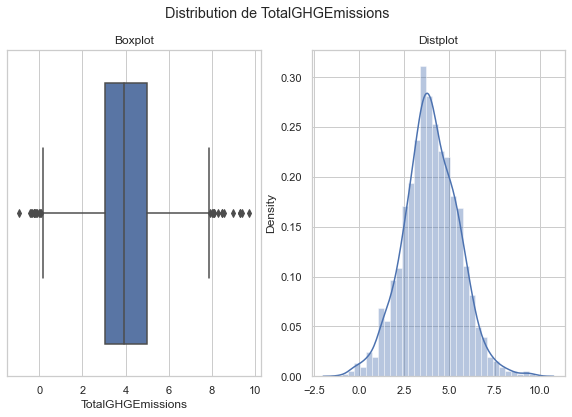

In [38]:
# Distribution de TotalGHGEmissions

f, axes = plt.subplots(1, 2, figsize=(10, 6))
f.suptitle("Distribution de TotalGHGEmissions")
ax1 = sns.boxplot(x=np.log(data['TotalGHGEmissions']), ax=axes[0])
ax1.set_title("Boxplot")
ax2 = sns.distplot(x=np.log(data['TotalGHGEmissions']), ax=axes[1])
ax2.set_title("Distplot")

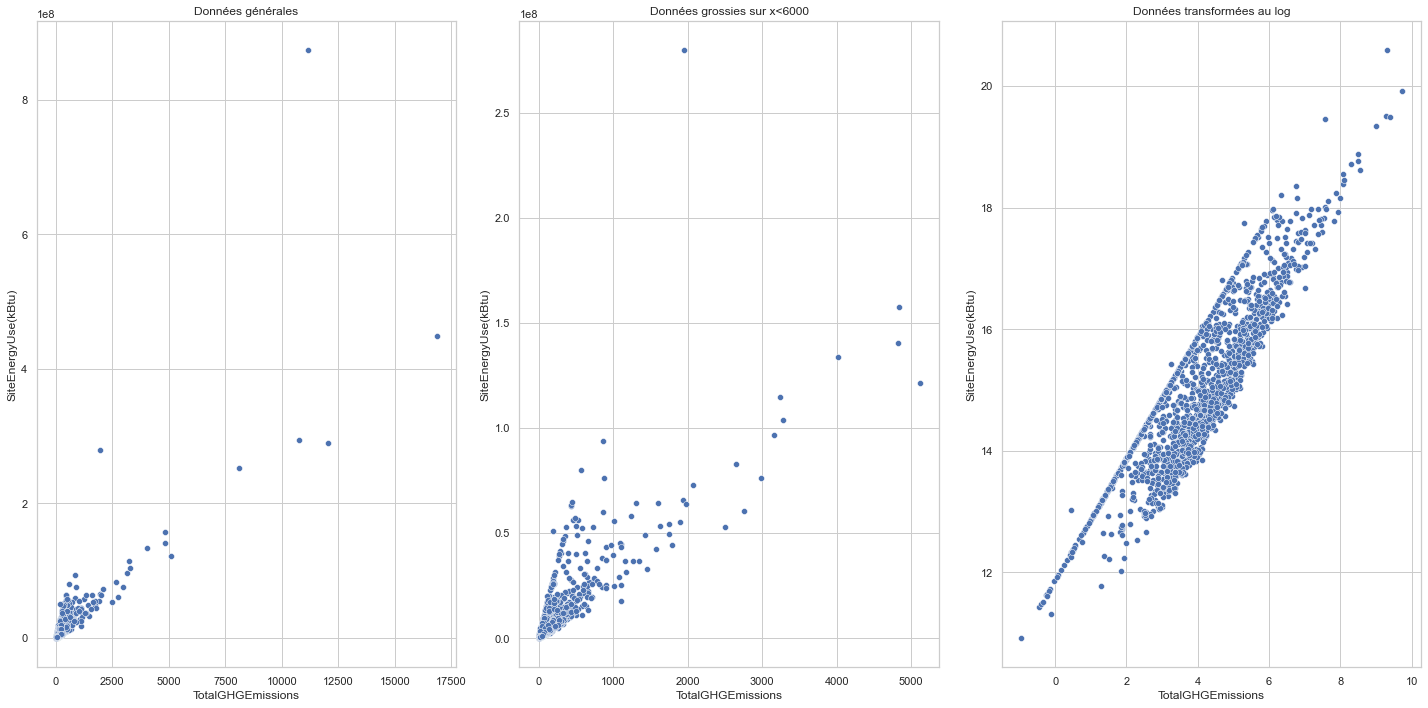

In [39]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

ax1.set_title("Données générales")
sns.scatterplot(data=data, x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=ax1)
ax2.set_title("Données grossies sur x<6000")
sns.scatterplot(data=data[(data['TotalGHGEmissions'] < 6000)], x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=ax2)
ax3.set_title("Données transformées au log")
sns.scatterplot(data=data, x=np.log(data["TotalGHGEmissions"]), y=np.log(data["SiteEnergyUse(kBtu)"]), ax=ax3)

fig.tight_layout()

On remarque plusieurs droites de régression linéaire entre SiteEnergyUse(kBtu) et TotalGHGEmissions

### Distribution des variables catégorielles

In [40]:
cat_variables = ['BuildingType', # Pie
                 'PrimaryPropertyType', # Pie
                 'Neighborhood', # Pie
                 'LargestPropertyUseType', # Pie
                 'SecondLargestPropertyUseType', # Pie
                 'ThirdLargestPropertyUseType'] # Pie
                 
int_cat_variables = ['YearBuilt', # Histograms
                 'NumberofFloors' ] # Histograms

In [41]:
# Pie Charts
def pie_chart(data, variable):

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize=(10, 7))
    wedges, texts, autotexts = ax.pie(data[variable].value_counts().sort_values(ascending=False).values,
                                      autopct=lambda pct: func(
                                          pct, data[variable].value_counts().values),
                                      # labels=data.variable.value_counts().index.str.upper(),
                                      startangle=90)

    # Adding legend
    ax.legend(wedges,
              labels=[f'{l} / {s:0.1f}%' for l, s in zip(data[variable].value_counts().index.str.upper(),
                                                        data[variable].value_counts().values*100./data[variable].value_counts().sum())
                      ],
              title="Légende",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")
    ax.set_title("Répartition des "+variable)

    # show plot
    plt.show()

Dans le premier Pie Chart, on remarque une catégorie dans PrimaryPropertyType en doublon : Restaurant et Restaurant\n.
- On corrige cela par la suite.

In [42]:
data['PrimaryPropertyType'] = data['PrimaryPropertyType'].replace('Restaurant\n', 'Restaurant')

<ipython-input-41-a969d1ee245a>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(wedges,


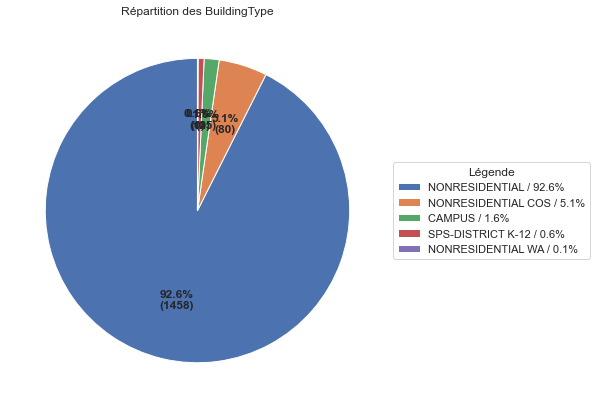

In [43]:
for i in ["BuildingType"]:
    pie_chart(data,i)

In [44]:
def barplot(data, variable):
    plt.figure(figsize=(14, 10))
    plt.title('Distribution des '+variable)
    plt.xticks(rotation=90)
    sns.countplot(data=data, y=data[variable]
                 #bins=int((data[variable].max() - data[variable].min())/1)
                  ,order = data[variable].value_counts().index
                 )
    fig.tight_layout()       
    plt.show()

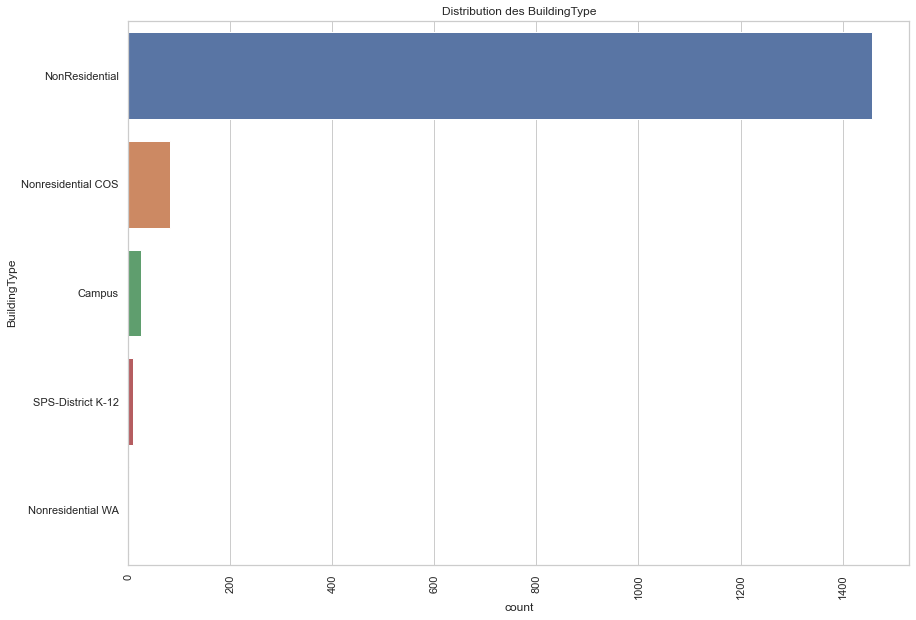

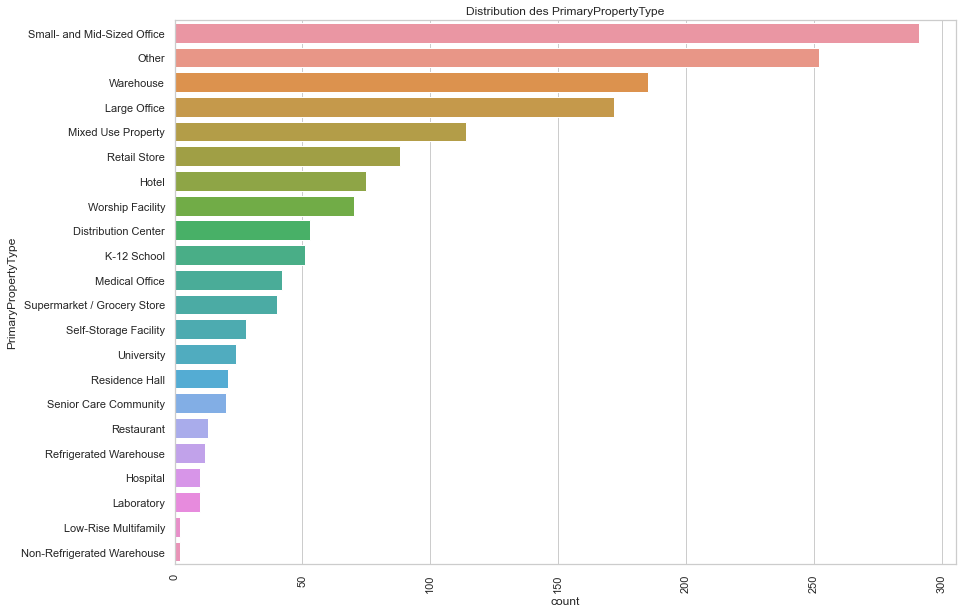

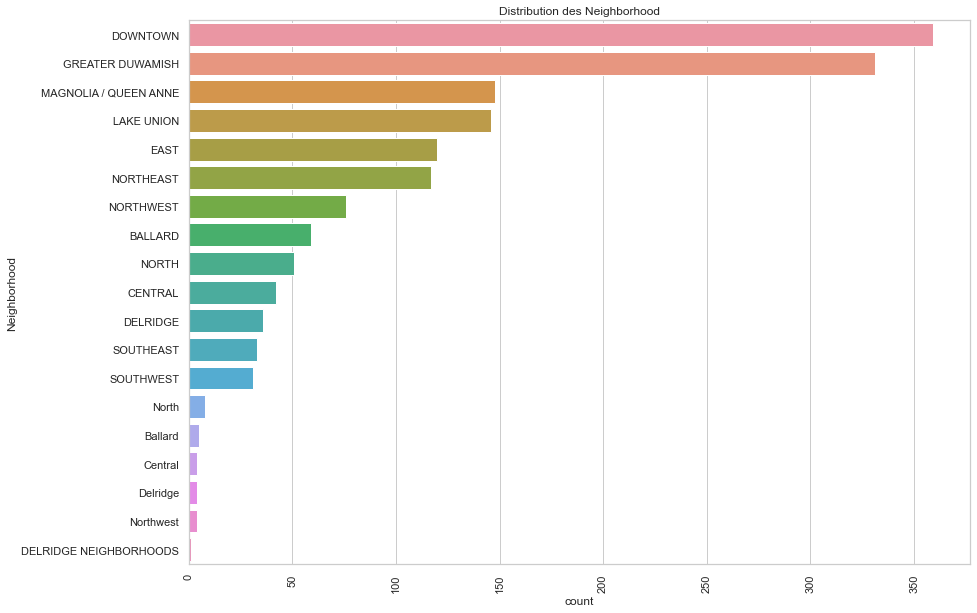

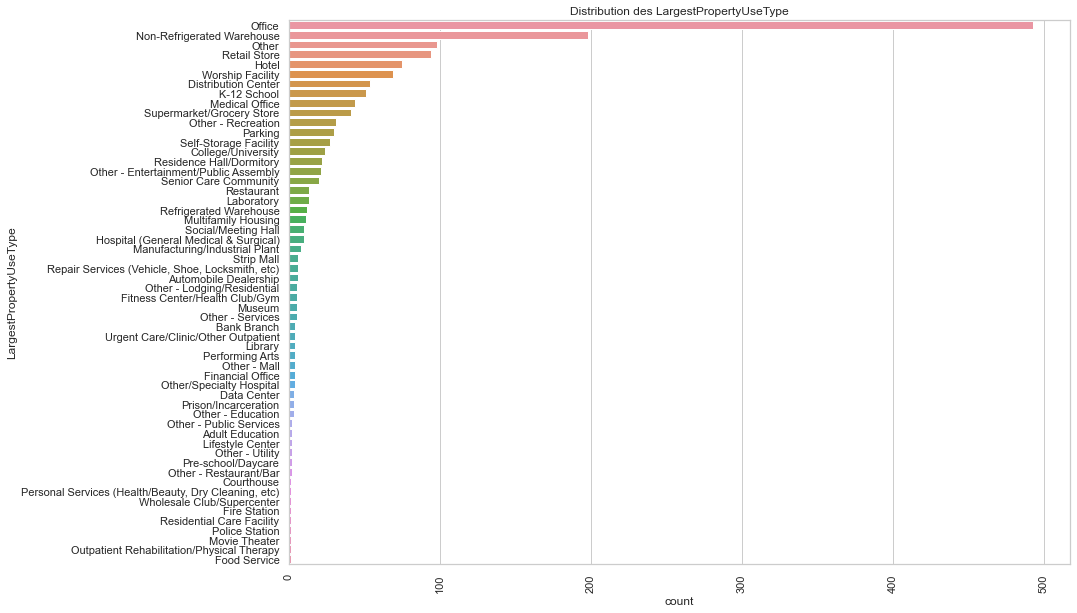

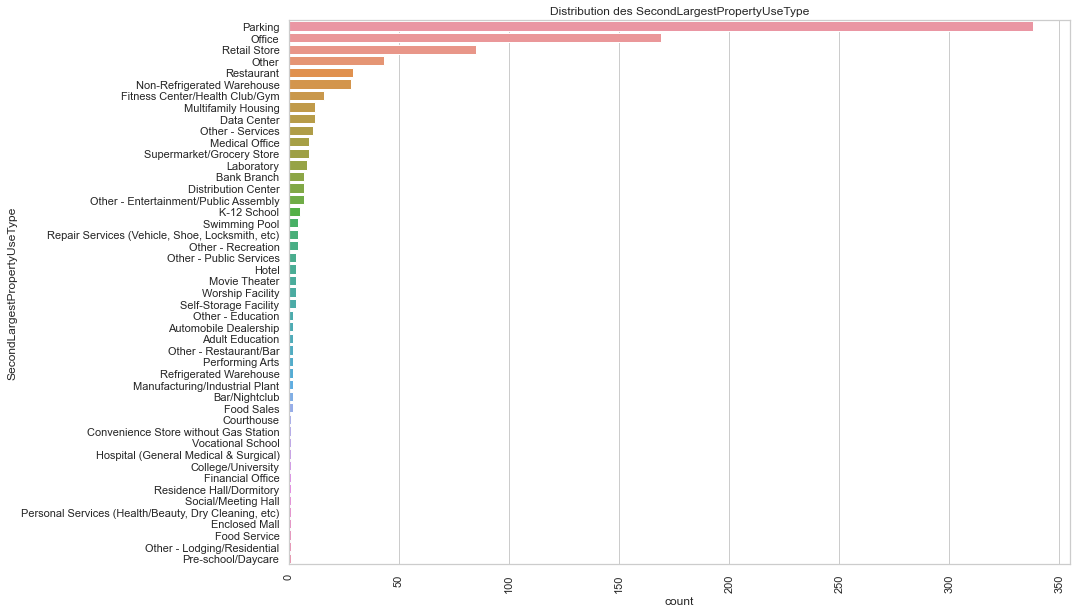

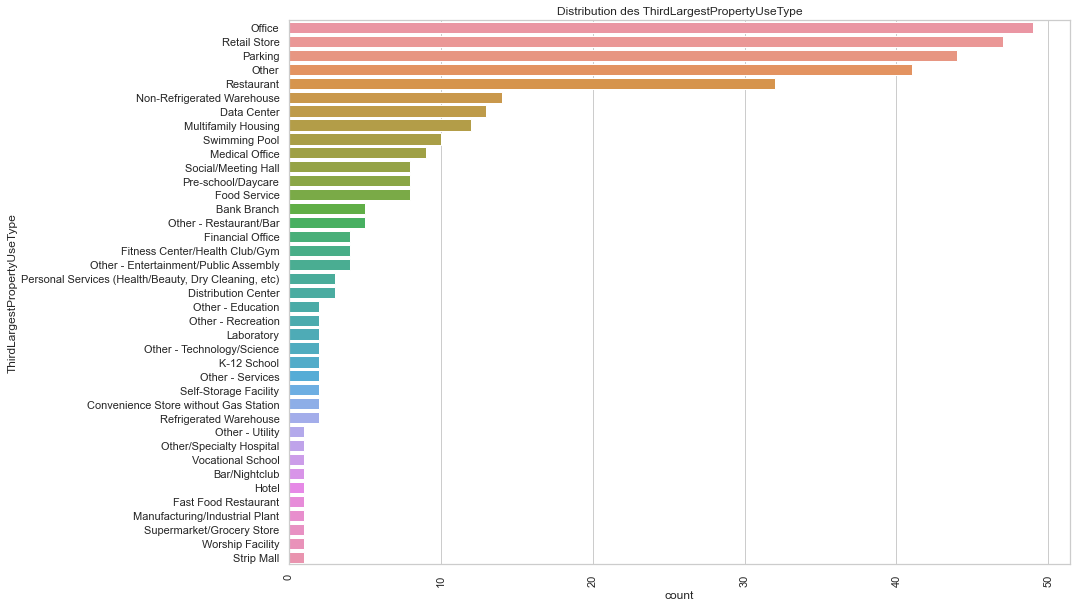

In [45]:
for i in cat_variables:
    barplot(data,i)

In [46]:
def histograms(data, variable):
    plt.figure(figsize=(10, 6))
    plt.title('Distribution des '+variable)
    sns.histplot(data=data, x=data[variable],
                 bins=int((data[variable].max() - data[variable].min())/1)
                 )
                
    plt.show()

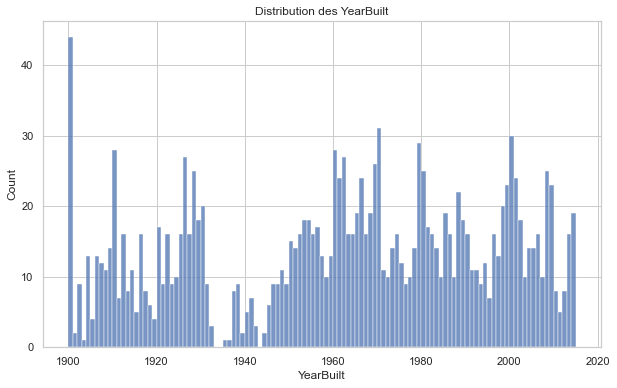

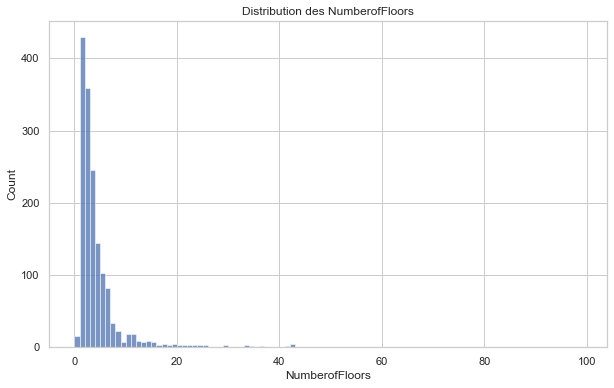

In [47]:
for i in int_cat_variables:
    histograms(data,i)

### Influence des variables catégorielles

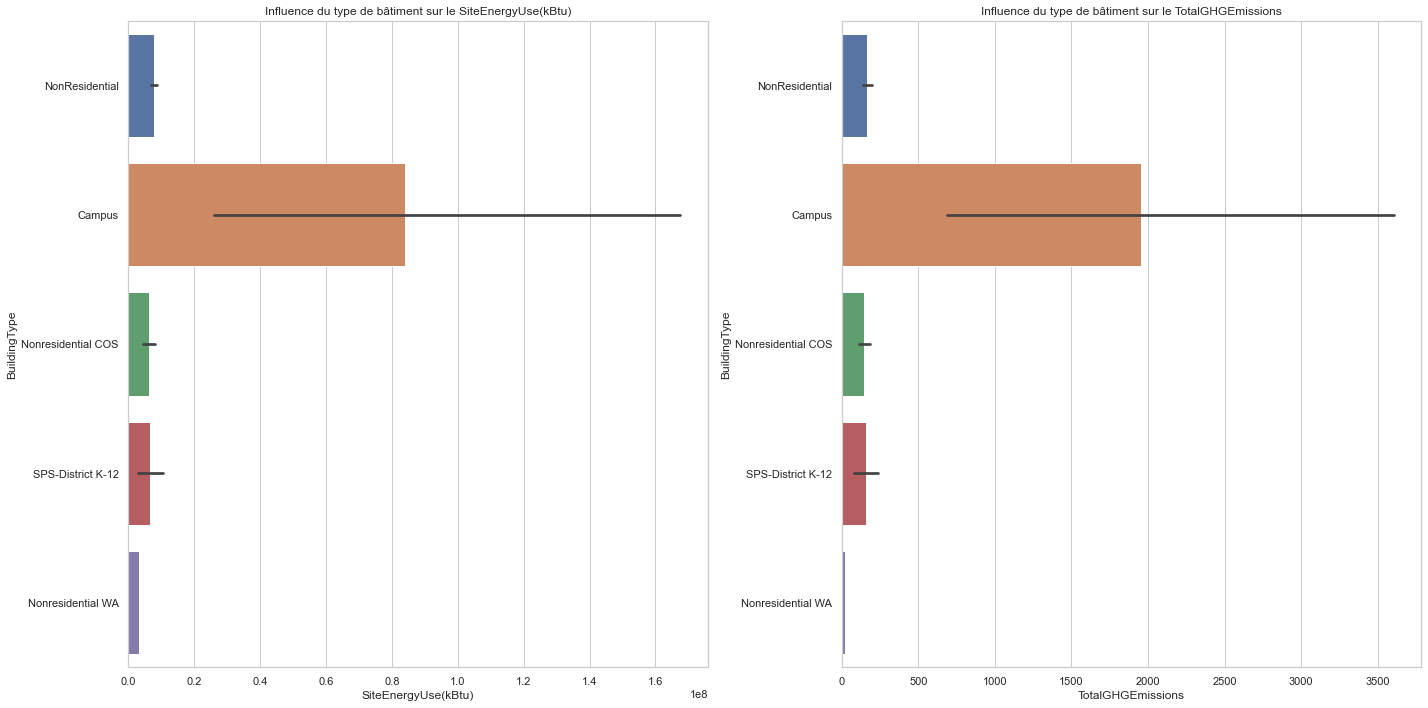

In [48]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax1.set_title("Influence du type de bâtiment sur le SiteEnergyUse(kBtu)")
sns.barplot(data=data, x="SiteEnergyUse(kBtu)", y="BuildingType", ax=ax1)
ax2.set_title("Influence du type de bâtiment sur le TotalGHGEmissions")
sns.barplot(data=data, x="TotalGHGEmissions", y="BuildingType", ax=ax2)

fig.tight_layout()

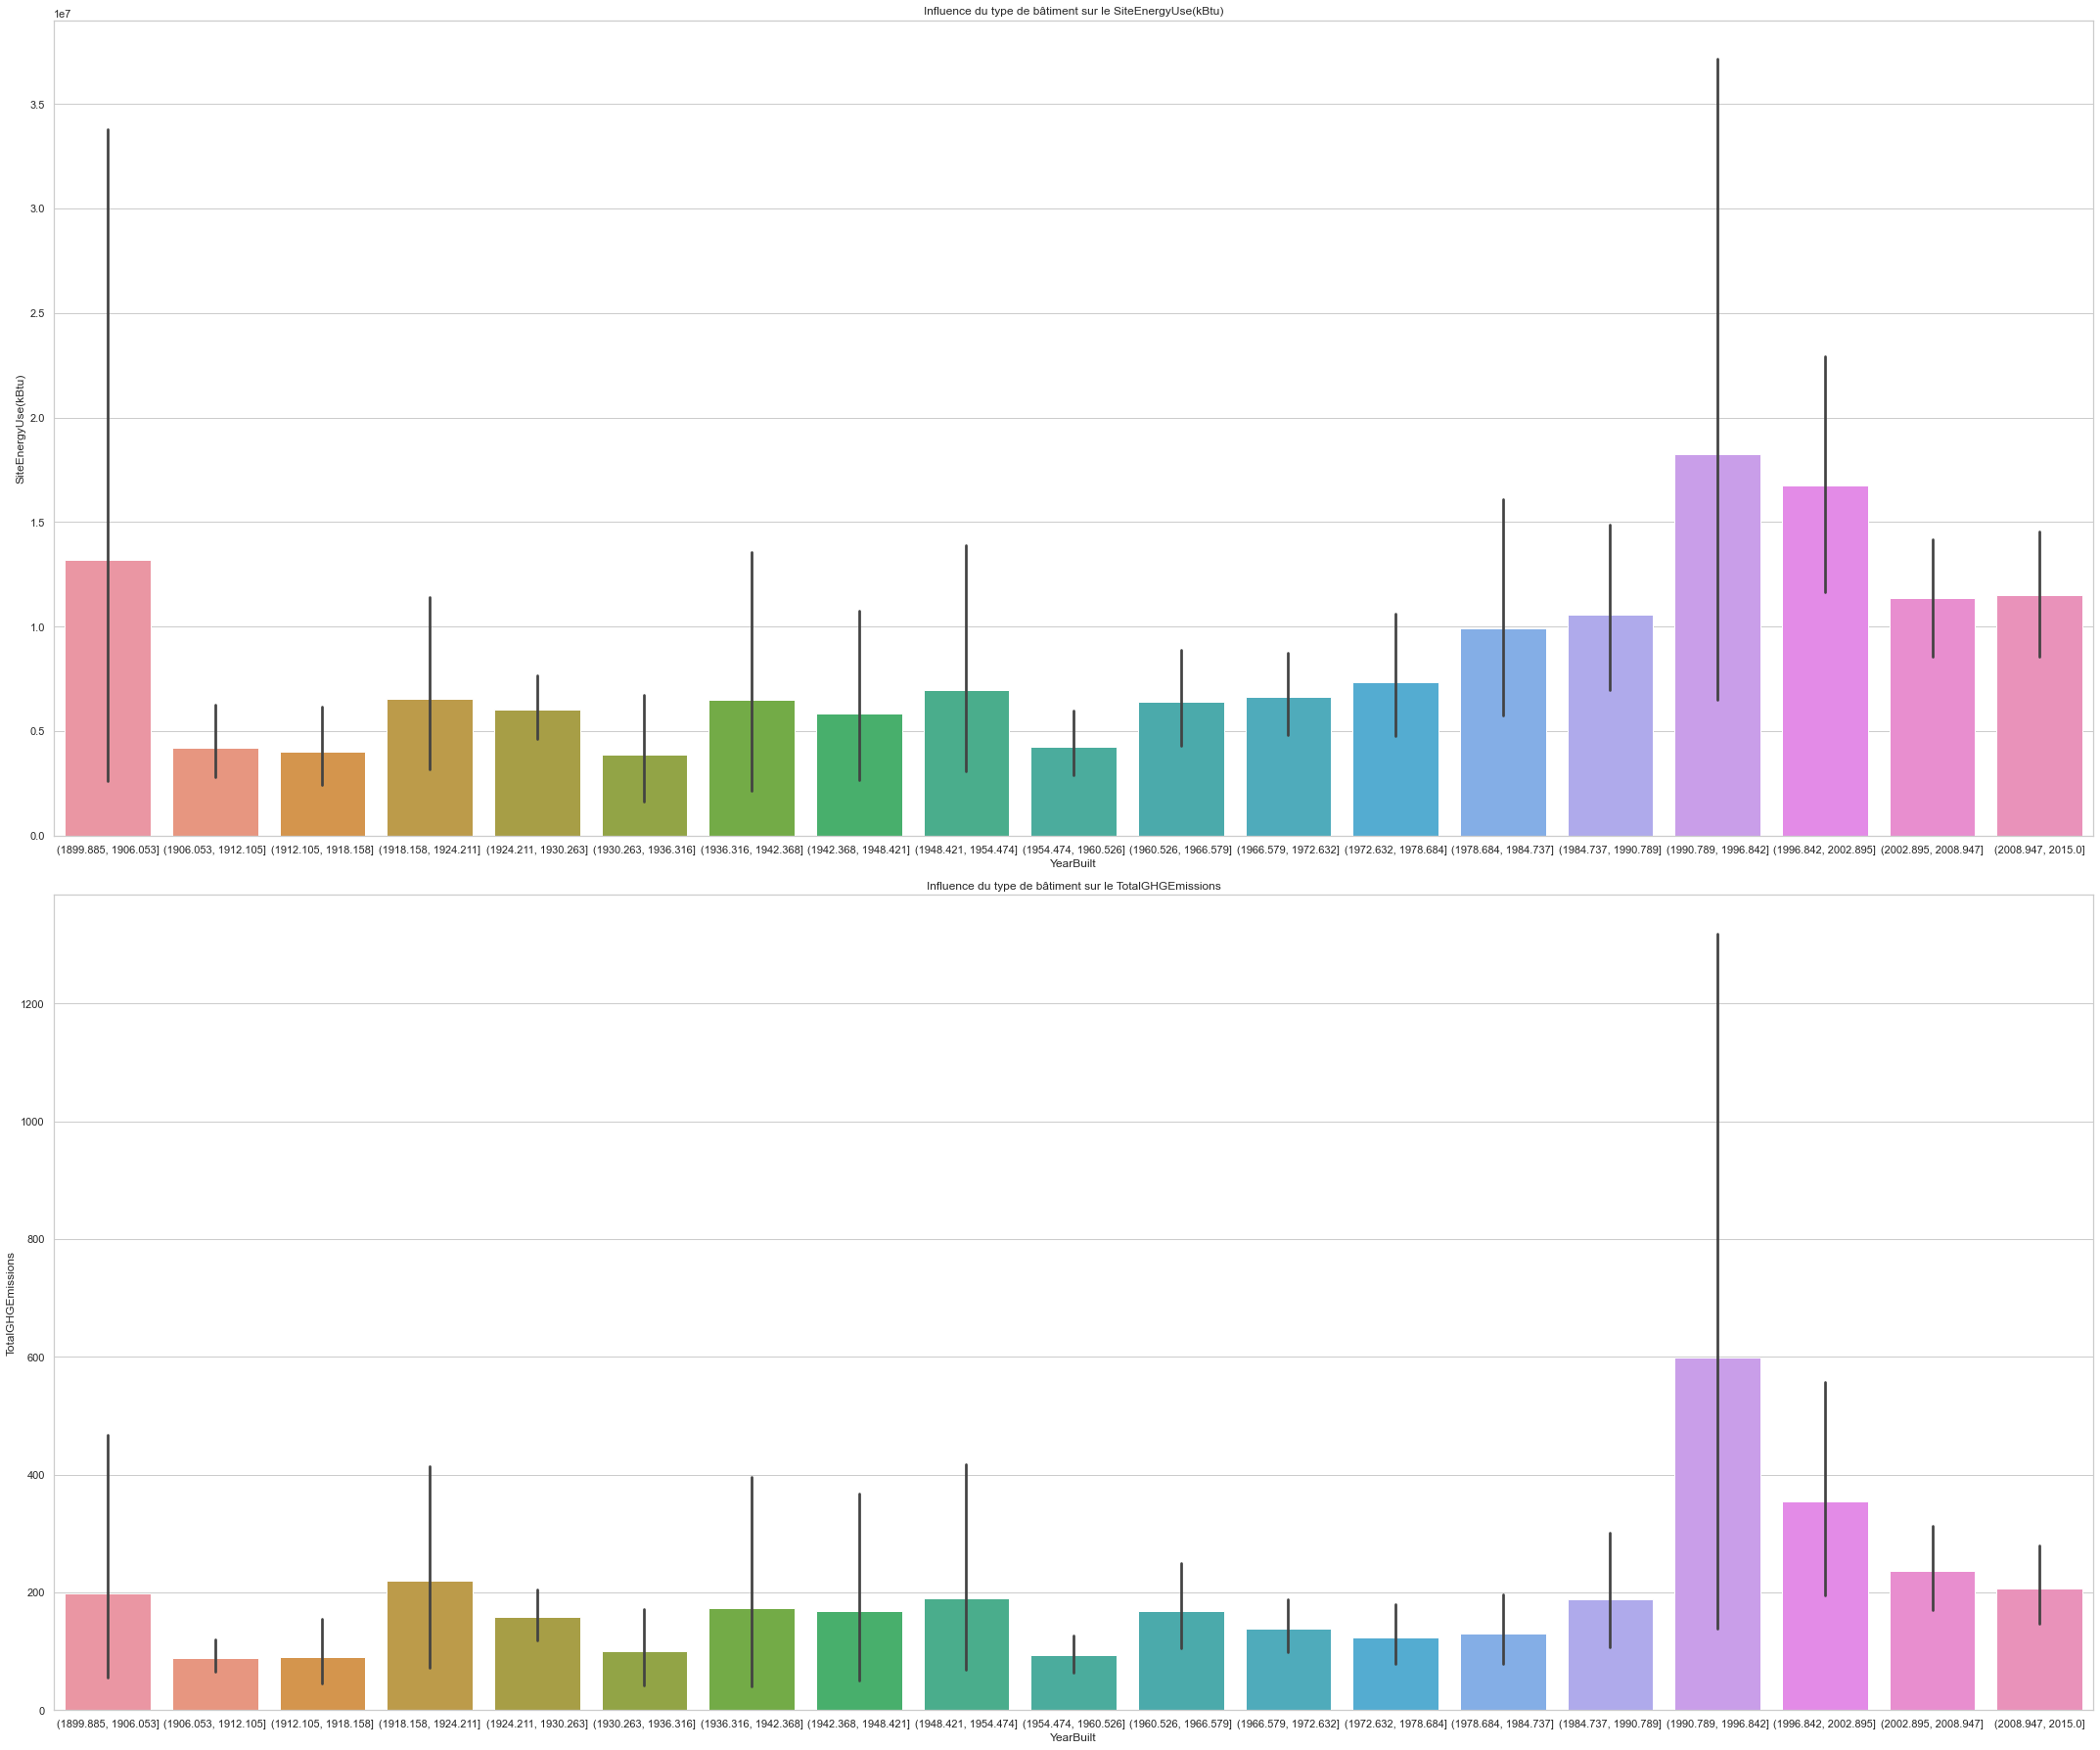

In [49]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(30, 25))

ax1.set_title("Influence du type de bâtiment sur le SiteEnergyUse(kBtu)")
sns.barplot(
    data=data,
    x=pd.cut(data['YearBuilt'], bins=int((data.YearBuilt.max() - data.YearBuilt.min())/6)), y="SiteEnergyUse(kBtu)",
    ax=ax1
)
ax2.set_title("Influence du type de bâtiment sur le TotalGHGEmissions")
sns.barplot(
    data=data,
    x=pd.cut(data['YearBuilt'], bins=int((data.YearBuilt.max() - data.YearBuilt.min())/6)), y="TotalGHGEmissions",
    ax=ax2
)

fig.tight_layout()

### Recherche des corrélations

,OSEBuildingID,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,1.000000,0.005585,0.019471,0.057649,-0.261539,-0.144177,-0.218993,-0.118051,-0.104799,-0.230283,-0.154686,-0.049269,-0.004111,-0.047807,-0.085322,-0.071840,0.084668
DataYear,0.005585,1.000000,0.035921,-0.002861,0.022470,0.007052,-0.043264,0.014068,-0.004078,-0.018547,0.025305,-0.029759,-0.017219,-0.003106,-0.011028,-0.022008,-0.008841
YearBuilt,0.019471,0.035921,1.000000,-0.035703,0.102217,0.104199,0.301796,0.063265,0.068892,0.258025,0.148468,-0.035802,0.134762,0.170389,0.072224,0.060878,-0.005901
NumberofBuildings,0.057649,-0.002861,-0.035703,1.000000,-0.024555,0.781083,0.000738,0.821727,0.834542,0.185422,0.004777,-0.061729,0.019353,0.019439,0.724771,0.411733,0.012644
NumberofFloors,-0.261539,0.022470,0.102217,-0.024555,1.000000,0.405334,0.502483,0.349277,0.334883,0.518821,0.242691,0.146535,0.011852,0.051127,0.216482,0.128782,-0.056477
PropertyGFATotal,-0.144177,0.007052,0.104199,0.781083,0.405334,1.000000,0.404197,0.990075,0.978266,0.799636,0.510410,0.147311,0.032689,0.052249,0.812634,0.534390,-0.008883
PropertyGFAParking,-0.218993,-0.043264,0.301796,0.000738,0.502483,0.404197,1.000000,0.271636,0.298736,0.528522,0.247764,0.134482,0.051681,0.096077,0.179310,0.097593,-0.089337
PropertyGFABuilding(s),-0.118051,0.014068,0.063265,0.821727,0.349277,0.990075,0.271636,1.000000,0.983374,0.780457,0.529065,0.135320,0.026454,0.040213,0.827487,0.547279,0.004380
LargestPropertyUseTypeGFA,-0.104799,-0.004078,0.068892,0.834542,0.334883,0.978266,0.298736,0.983374,1.000000,0.764191,0.453947,0.130851,0.027315,0.036996,0.847010,0.579847,0.029198
SecondLargestPropertyUseTypeGFA,-0.230283,-0.018547,0.258025,0.185422,0.518821,0.799636,0.528522,0.780457,0.764191,1.000000,0.679047,0.144155,0.053820,0.082252,0.674117,0.545739,0.097133


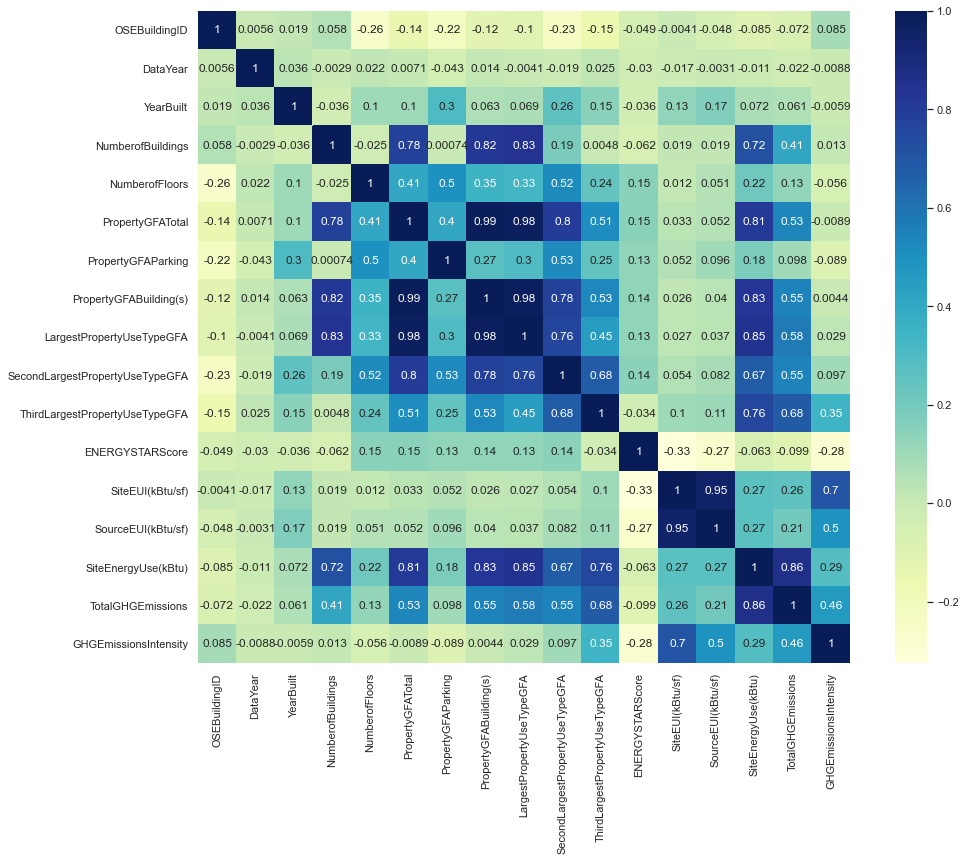

In [50]:
# Corrélation de Pearson

corr = data.corr()
display(corr)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 12))
    ax = sns.heatmap(corr, square=True, annot=True, cmap="YlGnBu")

In [51]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values()
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
32,PropertyGFATotal,PropertyGFABuilding(s),0.990075
30,LargestPropertyUseTypeGFA,PropertyGFABuilding(s),0.983374
28,LargestPropertyUseTypeGFA,PropertyGFATotal,0.978266
26,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),0.951263
24,TotalGHGEmissions,SiteEnergyUse(kBtu),0.861845
22,LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),0.847010
20,NumberofBuildings,LargestPropertyUseTypeGFA,0.834542
18,SiteEnergyUse(kBtu),PropertyGFABuilding(s),0.827487
16,NumberofBuildings,PropertyGFABuilding(s),0.821727
14,PropertyGFATotal,SiteEnergyUse(kBtu),0.812634


In [52]:
def retrieve_correlated_variable(variable, seuil):
    L = corr[(corr[variable] > seuil) &
             (corr[variable].index != variable)]
    L = L.index.tolist()
    return print('Variables corrélées à plus de '+str(seuil*100)+'% avec '+variable+' : ', L)

In [53]:
retrieve_correlated_variable('SiteEnergyUse(kBtu)',0.7)

retrieve_correlated_variable('TotalGHGEmissions',0.7)

Variables corrélées à plus de 70.0% avec SiteEnergyUse(kBtu) :  ['NumberofBuildings', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'TotalGHGEmissions']
Variables corrélées à plus de 70.0% avec TotalGHGEmissions :  ['SiteEnergyUse(kBtu)']


D'après la documentation des variables : 

- TotalGHGEmissions	
The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

- SiteEnergyUse(kBtu)	
The annual amount of energy consumed by the property from all sources of energy.

On peut se restreindre à n'étudier qu'uniquement la variable SiteEnergyUse (kBtu) car TotalGHGEmissions est un résultat de SiteEnergyUse x GHG emissions factor.

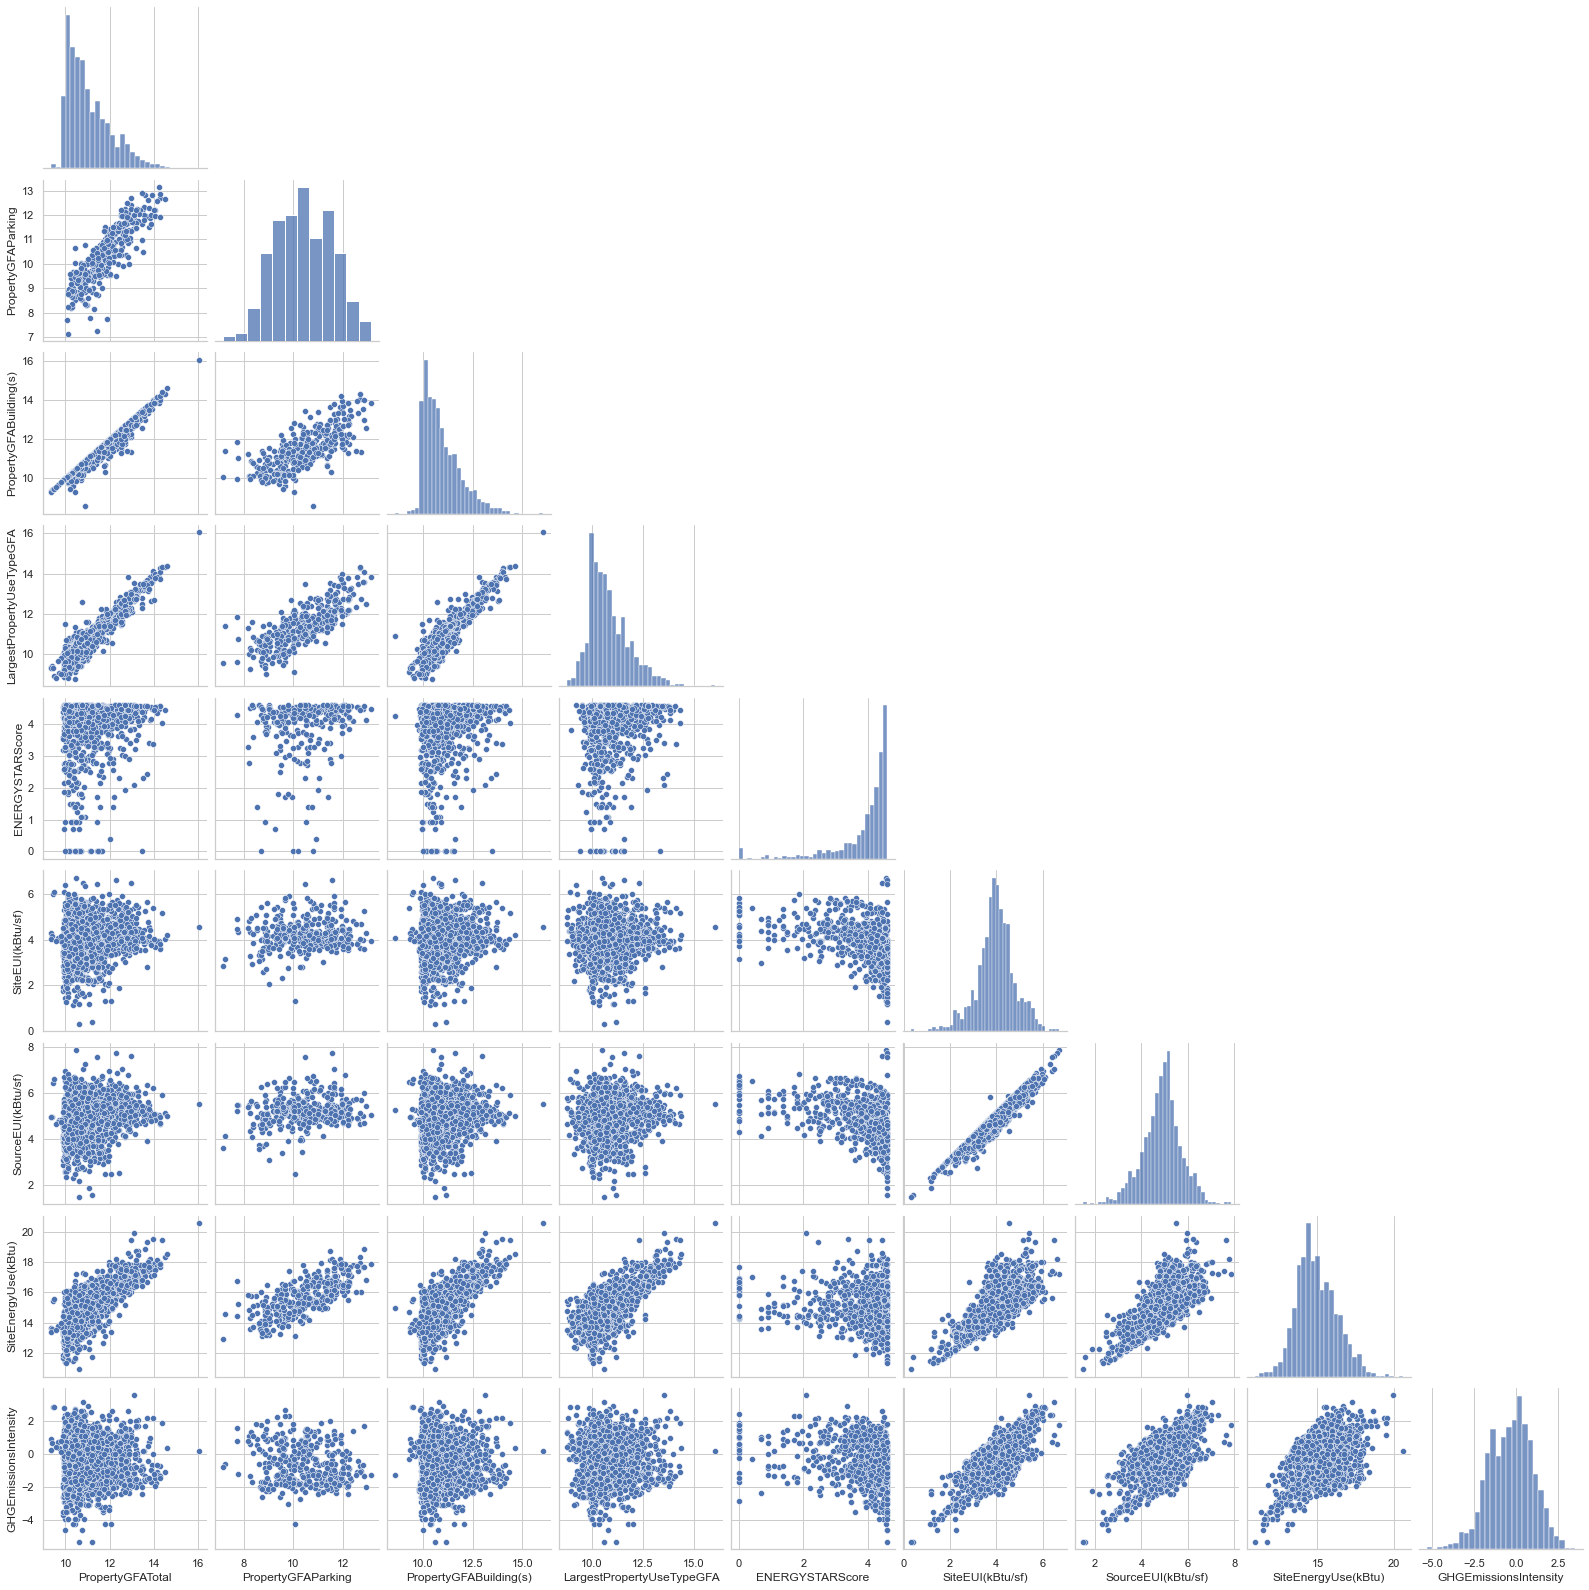

In [60]:
# Utilisation de quelques variables selectionnées
# Passer au log
sns.pairplot(data[[
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'GHGEmissionsIntensity']].transform(np.log).replace([np.inf, -np.inf], np.nan), corner=True)

In [48]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,State,ZipCode,Neighborhood,Latitude,Longitude,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,325,2015,NonResidential,Retail Store,WESTLAKE MALL RETAIL PORTION,400 PINE ST,WA,98101,DOWNTOWN,47.61171108,-122.33681575,NaN,NaN,NaN,NaN,NaN,1989.0,1.0,4.0,111077.0,0.0,111077.0,NaN,NaN,NaN,91.0,60.600000,190.200000,9.898724e+06,0.0,9.899135e+06,0.000000e+00,69.01,0.24
1,400,2015,NonResidential,Small- and Mid-Sized Office,GALLAND & SENECA BUILDINGS,1201 2ND AVE,WA,98101,DOWNTOWN,47.60679898,-122.3371001,Office,Office,NaN,NaN,NaN,1906.0,1.0,6.0,98370.0,25920.0,72450.0,98370.0,NaN,NaN,45.0,66.300000,207.500000,6.525887e+06,0.0,6.488262e+06,3.789300e+04,47.24,0.20
2,442,2015,NonResidential,Large Office,KING BROADCASTING,333 DEXTER AVE N,WA,98109,LAKE UNION,47.6214758,-122.3430502,"Data Center, Office, Other, Parking, Restaurant",Office,Parking,Other,NaN,1947.0,1.0,4.0,193788.0,37854.0,155934.0,138672.0,47539.0,11166.0,59.0,105.800000,332.300000,1.676022e+07,0.0,1.676091e+07,0.000000e+00,116.84,0.23
3,499,2015,NonResidential,Small- and Mid-Sized Office,ASIAN COUNSELING and REFERRAL SERVICE BUILDING,3639 MARTIN LUTHER KING JR WAY S,WA,98144,GREATER DUWAMISH,47.57089656,-122.2974118,"Office, Parking",Office,Parking,NaN,NaN,2008.0,1.0,3.0,76598.0,21410.0,55188.0,55188.0,21410.0,NaN,76.0,81.100000,169.800000,4.476997e+06,0.0,2.234200e+06,2.242889e+06,134.69,1.63
4,559,2015,NonResidential,Large Office,YALE & THOMAS,325 EASTLAKE AVE E,WA,98109,LAKE UNION,47.6212428,-122.3297865,"Office, Parking",Office,Parking,NaN,NaN,1981.0,1.0,4.0,186971.0,0.0,186971.0,186977.0,115477.0,NaN,86.0,67.700000,179.100000,1.266246e+07,0.0,9.657951e+06,3.004906e+06,226.92,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,50221,2016,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,WA,NaN,DELRIDGE NEIGHBORHOODS,47.5407,-122.374,Other - Recreation,Other - Recreation,NaN,NaN,NaN,1982.0,1.0,1.0,18261.0,0.0,18261.0,18261.0,NaN,NaN,NaN,51.000000,126.000000,9.320821e+05,0.0,6.323620e+05,2.997200e+05,20.33,1.11
1694,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,WA,NaN,DOWNTOWN,47.5962,-122.323,Other - Recreation,Other - Recreation,NaN,NaN,NaN,2004.0,1.0,1.0,16000.0,0.0,16000.0,16000.0,NaN,NaN,NaN,59.400002,114.199997,9.502762e+05,0.0,3.965461e+05,5.537300e+05,32.17,2.01
1695,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,WA,NaN,MAGNOLIA / QUEEN ANNE,47.6364,-122.358,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,NaN,1974.0,1.0,1.0,13157.0,0.0,13157.0,7583.0,5574.0,0.0,NaN,438.200012,744.799988,5.765898e+06,0.0,1.792159e+06,3.973739e+06,223.54,16.99
1696,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,WA,NaN,GREATER DUWAMISH,47.5283,-122.324,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,NaN,1989.0,1.0,1.0,14101.0,0.0,14101.0,6601.0,6501.0,484.0,NaN,51.000000,105.300003,7.194712e+05,0.0,3.488702e+05,3.706010e+05,22.11,1.57


# Export du fichier nettoyé

In [106]:
# Export du de data en .csv pour la suite de l'étude
data.to_csv('cleaned_building-energy-benchmarking.csv')